In [1]:
!pip3 install box2d-py==2.3.8

     |████████████████████████████████| 450kB 5.8MB/s 


In [2]:
import gym
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import base64
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
from keras.models import load_model, Model
import keras.backend as K
from collections import deque
from IPython import display as ipythondisplay

Using TensorFlow backend.


In [0]:
class A(object):
  def __init__(self,Alpha, Gamma, n_actions, 
               layer1_size,layer2_size, input_dims):
    self.gamma = Gamma
    self.learning_rate = Alpha
    self.G = 0
    self.input_dims = input_dims
    self.layer1_size = layer1_size
    self.layer2_size = layer2_size
    self.n_actions= n_actions
    self.state_memory = []
    self.action_memory = []
    self.reward_memory = []
    self.policy, self.predict = self.building_policy()
    self.action_space= [i for i in range (n_actions)]

  def building_policy(self): 
    frames_input = Input(shape =(self.input_dims,))
    advantages = Input(shape=[1])
    hidden1 =Dense(self.layer1_size,activation = 'relu')(frames_input)#buildingnueralnetwork
    hidden2 =Dense(self.layer2_size,activation = 'relu')(hidden1)
    output_F = Dense(self.n_actions,activation='softmax')(hidden2)

    def loss(y_true,y_pred): #-log-likelihood
      out = K.clip(y_pred,1e-8,1-1e-8)
      log_lik = y_true*K.log(out)
      return K.sum(-log_lik*advantages)
    
    policy = Model(input=[frames_input,advantages], output =[output_F])#
    policy.compile(optimizer=Adam(lr=self.learning_rate),loss=loss)
    predict = Model(input=[frames_input],output=[output_F])
    return policy, predict

  def choose_action(self, observation):#actionspace
    state = observation[np.newaxis, :]
    probabilities = self.predict.predict(state)[0]
    action = np.random.choice(self.action_space, p= probabilities)
    return action

  def store_transition(self,observation,action,reward):
    self.action_memory.append(action)
    self.state_memory.append(observation)
    self.reward_memory.append(reward)
  
  def learn(self):#agent_learning_alg
    state_memory = np.array(self.state_memory)
    action_memory = np.array(self.action_memory)
    reward_memory = np.array(self.reward_memory)

    actions = np.zeros([len(action_memory),self.n_actions])
    actions[np.arange(len(action_memory)),action_memory] = 1

    G = np.zeros_like(reward_memory)
    for i in range(len(reward_memory)):
      G_sum = 0
      discount = 1
      for j in range (i, len(reward_memory)):
        G_sum += reward_memory[j]*discount
        discount *= self.gamma
      G[i] = G_sum
    mean = np.mean(G)
    std = np.std(G) if np.std(G) > 0 else 1
    self.G = (G-mean)/std

    cost = self.policy.train_on_batch([state_memory,self.G],actions)
    
    self.state_memory = []
    self.action_memory = []
    self.reward_memory = []

In [0]:
 def main():
  env = gym.make('Acrobot-v1')
  trials  = 1000
  total_rewards = []
  episode= 0
  agent = A(Alpha=0.0005, Gamma = 0.99,input_dims= 6, n_actions = 3, 
               layer1_size = 128,layer2_size = 64)#setting_hyperparameters

  for trail in range(trials):
    observation = env.reset()
    total_reward = 0
    done= False
    step = 0
    while not done:
      action = agent.choose_action(observation)
      observation_,reward,done,_ = env.step(action)
      agent.store_transition(observation,action,reward)
      observation = observation_
      total_reward +=reward
    total_rewards.append(total_reward)
    agent.learn() 
    print('Trial number',trail)
    print('Trial Reward',total_reward)
  return total_rewards

In [8]:
if __name__ == "__main__":
  total_rewards = main()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Trial number 0
Trial Reward -500.0
Trial number 1
Trial Reward -500.0
Trial number 2
Trial Reward -500.0
Trial number 3
Trial Reward -500.0
Trial number 4
Trial Reward -500.0
Trial number 5
Trial Reward -500.0
Trial number 6
Trial Reward -500.0
Trial number 7
Trial Reward -500.0
Trial number 8
Trial Reward -500.0
Trial number 9
Trial Reward -500.0
Trial number 10
Trial Reward -395.0
Trial number 11
Trial Reward -500.0
Trial number 12
Trial Reward -500.0
Trial number 13
Trial Reward -500.0
Trial number 14
Trial Reward -500.0
Trial number 15
Trial Reward -500.0
Trial number 16
Trial Reward -500.0
Trial number 17
Trial Reward -500.0
Trial number 18
Trial Reward -500.0
Trial number 19
Trial Reward -426.0
Trial number 20
Trial Reward -500.0
Trial number 21
Trial Reward -500.0
Trial number 22
Trial Reward -500.0
Trial number 23
Trial Reward -500.0
Trial number 24
Trial Reward -498.0
Trial number 25
Trial Reward -459.0
Trial number 26
Trial Reward -500.0
Trial number 27
Trial Reward -463.0
Tr

[-500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -395.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -500.0, -426.0, -500.0, -500.0, -500.0, -500.0, -498.0, -459.0, -500.0, -463.0, -500.0, -500.0, -500.0, -500.0, -327.0, -489.0, -500.0, -494.0, -500.0, -500.0, -392.0, -428.0, -454.0, -295.0, -500.0, -500.0, -500.0, -364.0, -259.0, -452.0, -500.0, -500.0, -500.0, -500.0, -285.0, -398.0, -500.0, -328.0, -500.0, -424.0, -372.0, -354.0, -235.0, -464.0, -233.0, -386.0, -303.0, -312.0, -303.0, -300.0, -487.0, -255.0, -272.0, -307.0, -254.0, -186.0, -343.0, -341.0, -278.0, -317.0, -331.0, -364.0, -156.0, -316.0, -315.0, -187.0, -261.0, -166.0, -212.0, -500.0, -230.0, -310.0, -278.0, -316.0, -242.0, -231.0, -304.0, -242.0, -261.0, -275.0, -277.0, -298.0, -440.0, -314.0, -254.0, -181.0, -272.0, -259.0, -278.0, -213.0, -214.0, -151.0, -246.0, -175.0, -245.0, -319.0, -477.0, -198.0, -234.0, -232.0, -189.0, -197.0, -253.0, -470.0, -280.0, -257.0, -221.0,

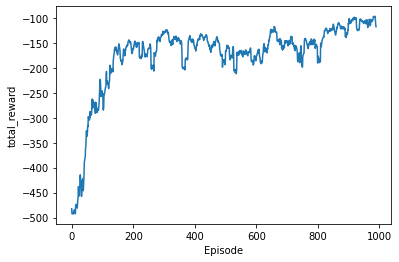

In [9]:
window = 10
plt.xlabel('Episode')
plt.ylabel('total_reward')
plt.plot([np.mean(total_rewards[tr:tr+window]) for tr in range(window, len(total_rewards))])
print(total_rewards)